In [188]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.1.0.post100'

# Data Preparing and loading

In [189]:
# Create known parameters
weight = 0.7
bias = 0.3

# in linear reqgression, weight is 'b' and bias is 'a' from
# Y = a + bX

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
#unsqueeze adds one more bracket

In [190]:
# Splitting in training(60-80) and test(20-40) set

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]


In [191]:
def plot_predictions(train_data=X_train, train_lables=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    #plots training daat, test data and compare predictiosn
    plt.figure(figsize=(10,7))
    #Plot training data in blue
    plt.scatter(train_data, train_lables, c="b", s=4, label="Training data")
    #Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    # plot predictions if exist

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Prediction")
    #legend
        
    plt.legend(prop={"size": 14});


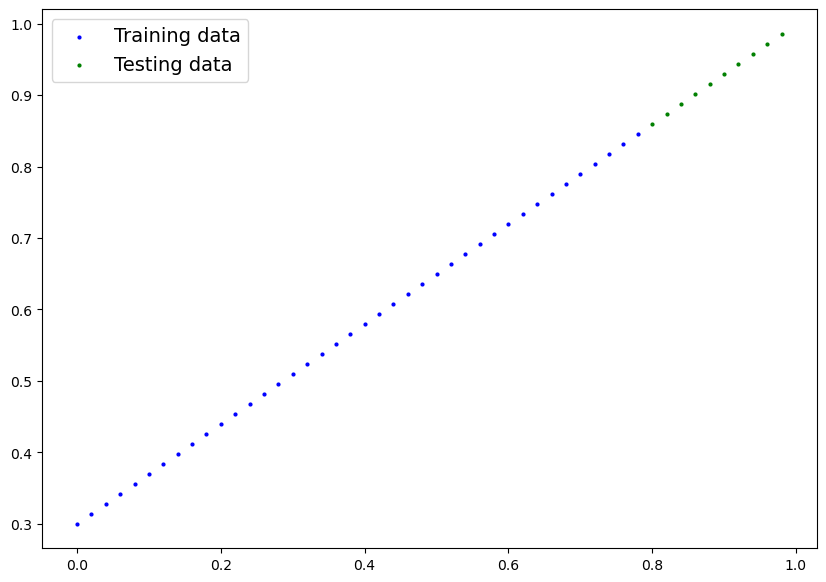

In [192]:
plot_predictions()

In [193]:
# create a model with param as A and B
# Create linear regression model class

class LinearRegressionModel(nn.Module): #inherits from nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float))


    # Forward Method to define computation in Model
    # x is input data
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias




What model does:
*  start with random values of weight and bias
* Look at training data and adjust the random vaues to get closer to ideal values


How it does?
1. Gradient Descent
2. Back propogation



### TOrch model building essentials

* torch.nn - contains all building blocks for Neural Network

* toech.nn.Parameter - Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".

* torch.nn.Module - The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a f`orward()` method be implemented.

* torch.optim - Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

* `def forward()` All nn.Module subclasses require you to override forward(), this is what happens in forward computation


In [194]:
torch.manual_seed(57)

model_0 = LinearRegressionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([0.1446], requires_grad=True),
 Parameter containing:
 tensor([-0.1165], requires_grad=True)]

In [195]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.1446])), ('bias', tensor([-0.1165]))])

In [196]:
# Make predictions using torch.inference_mode()
# When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

#inference reduces gradient

tensor([[-0.0008],
        [ 0.0021],
        [ 0.0050],
        [ 0.0079],
        [ 0.0108],
        [ 0.0136],
        [ 0.0165],
        [ 0.0194],
        [ 0.0223],
        [ 0.0252]])

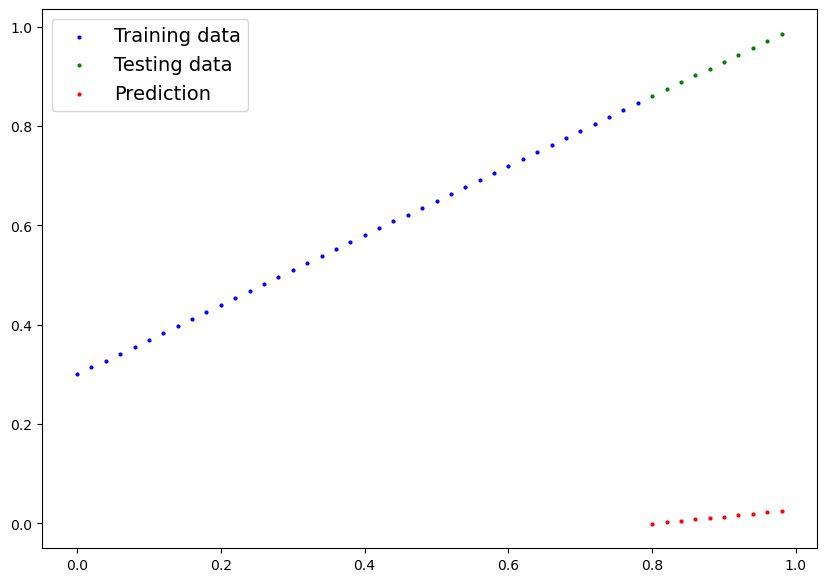

In [197]:
plot_predictions(predictions=y_preds)

In [198]:
# idea of training is to move from randomm param to some known params

# One way to measure how poor or wrong your model predictions are is to use a loss func

# Loss func is also called cost func or criterion

# 5:45:41
# loss func is measure of how wrong your predictions are compared to OG

# optimizer: Takes into account loss of model and adjust the params

# For torch, we need a training loop and a testing loop

In [199]:
# set up Loss function (pick fron many)

loss_fn = nn.L1Loss()


# setup an optimizer (pick fron many)
# stochastic gradient descent

# LR := learning rate , most imp param
# smol Lr, smol change in param

optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.01) 

#### Training Loop (and testing) in Torch

0. Loop through data
1. Forward pass (involve data moving through model's `forward()` func) := called as forward propogation
2. Calculate the loss (compare forward pass prediction to ground truth lable)
3. OPtimizer zero grad
4. Loss backward - move backwards through network to calculate gradients of each param of model wrt loss (**back propogation**)

5. Optimizer step := use to adjust model's param to try and improve loss  (**gradient descent**)

In [203]:
torch.manual_seed(57)

# epoch is one loop through data, hyperparameter
epochs = 200

# Training

# 0.
for epoch in range(epochs):
    #train mode sets all param that require gradient to gradient
    model_0.train()

    # 1.
    y_pred = model_0(X_train)

    # 2.
    loss = loss_fn(y_pred, y_train)
    # 3. 
    optimizer.zero_grad() # make it zero, because it accumulates garbage value


    # 4.
    loss.backward()

    # 5.

    optimizer.step() 

    # tessting
    model_0.eval() # turns off gradient tracking, not needed for testing

    with torch.inference_mode():
        #1. do forward pass
        test_pred = model_0(X_test)

        #2. calculate test loss
        test_loss = loss_fn(test_pred, y_test)

    

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")
        # print state
        print(model_0.state_dict())



Epoch: 0 | Train loss: 0.015719790011644363 | Test loss: 0.036095160990953445
OrderedDict({'weights': tensor([0.6235]), 'bias': tensor([0.3320])})
Epoch: 100 | Train loss: 0.0027762926183640957 | Test loss: 0.013553649187088013
OrderedDict({'weights': tensor([0.6904]), 'bias': tensor([0.2950])})


In [204]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6943])), ('bias', tensor([0.3050]))])

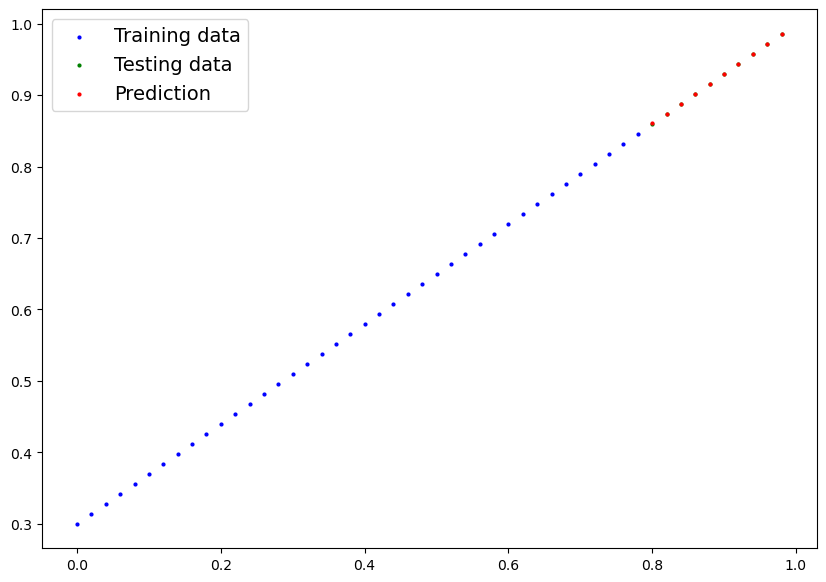

In [205]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)